## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, roc_auc_score

## Loading Data

In [42]:
df = pd.read_csv('/content/Customer_Churn.csv')

## EDA

In [43]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7514,7515,15715907,Onwubiko,699,Male,64.0,9,113109.52,1,1.0,0.0,27980.80,1
7409,7410,15688059,Chin,807,Female,42.0,9,105356.09,2,1.0,1.0,130489.37,0
6066,6067,15580249,Lori,502,Male,45.0,0,0.00,1,0.0,0.0,84663.21,0
7336,7337,15801072,Hurst,654,Female,28.0,7,0.00,2,1.0,0.0,151316.37,0
6321,6322,15689096,Beneventi,590,Male,47.0,0,117879.32,1,1.0,1.0,8214.46,0


In [44]:
df.drop(columns=['RowNumber',	'CustomerId',	'Surname'], inplace=True)

In [45]:
df.shape

(10002, 10)

In [46]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922208,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,96.661615,10.487218,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Gender           10002 non-null  object 
 2   Age              10001 non-null  float64
 3   Tenure           10002 non-null  int64  
 4   Balance          10002 non-null  float64
 5   NumOfProducts    10002 non-null  int64  
 6   HasCrCard        10001 non-null  float64
 7   IsActiveMember   10001 non-null  float64
 8   EstimatedSalary  10002 non-null  float64
 9   Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 781.5+ KB


In [48]:
df.isnull().sum()

,0
CreditScore,0
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0
Exited,0


In [49]:
df.dropna(inplace=True)

In [50]:
df.shape

(9999, 10)

In [51]:
print(df.groupby('Exited').size())

Exited
0    7961
1    2038
dtype: int64


In [52]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

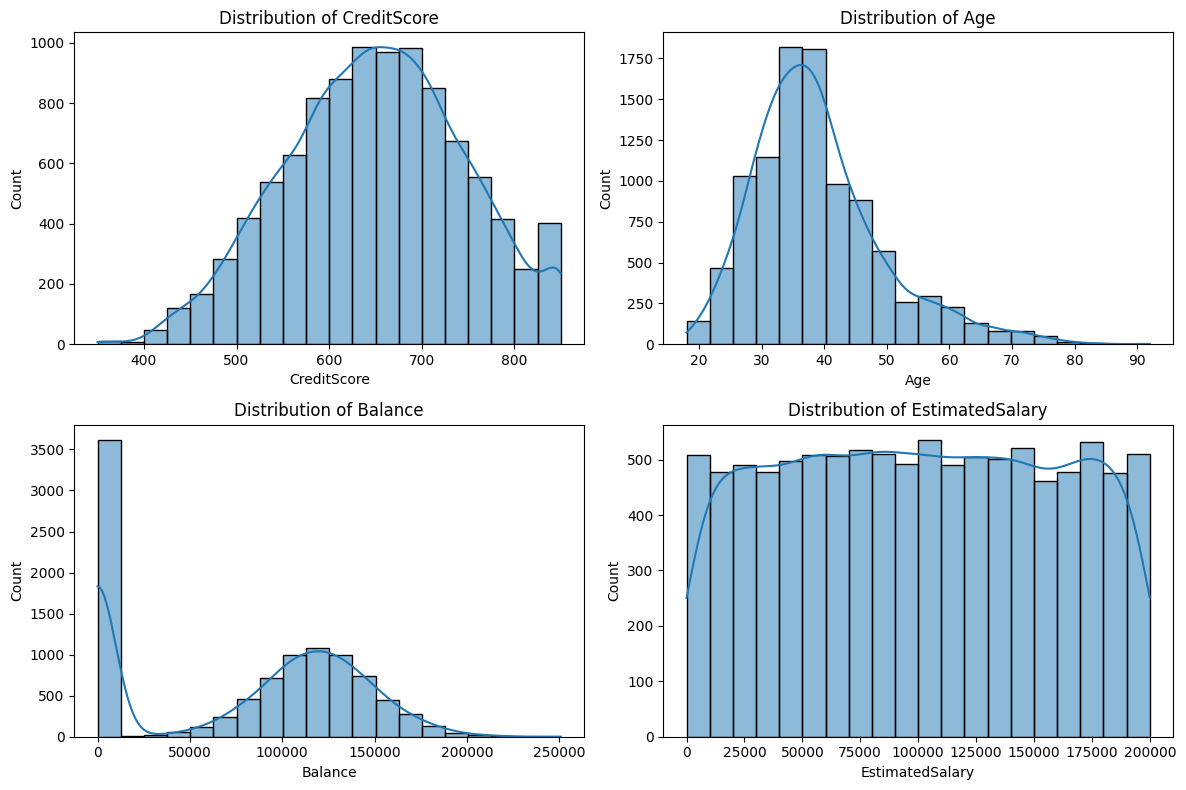

In [53]:
col_1 = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(col_1):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

1. **Credit Score**: Follows a normal distribution, with most customers having scores between 550 and 750. Few customers have extremely low or high credit scores.
  
2. **Age**: Right-skewed distribution with most customers aged 30-40. Few customers are younger than 20 or older than 70.

3. **Balance**: A large number of customers have zero balance, while the rest show a near-normal distribution, peaking around 100,000–150,000.

4. **Estimated Salary**: Fairly uniform distribution across all salary ranges, indicating a diverse income spread among customers.

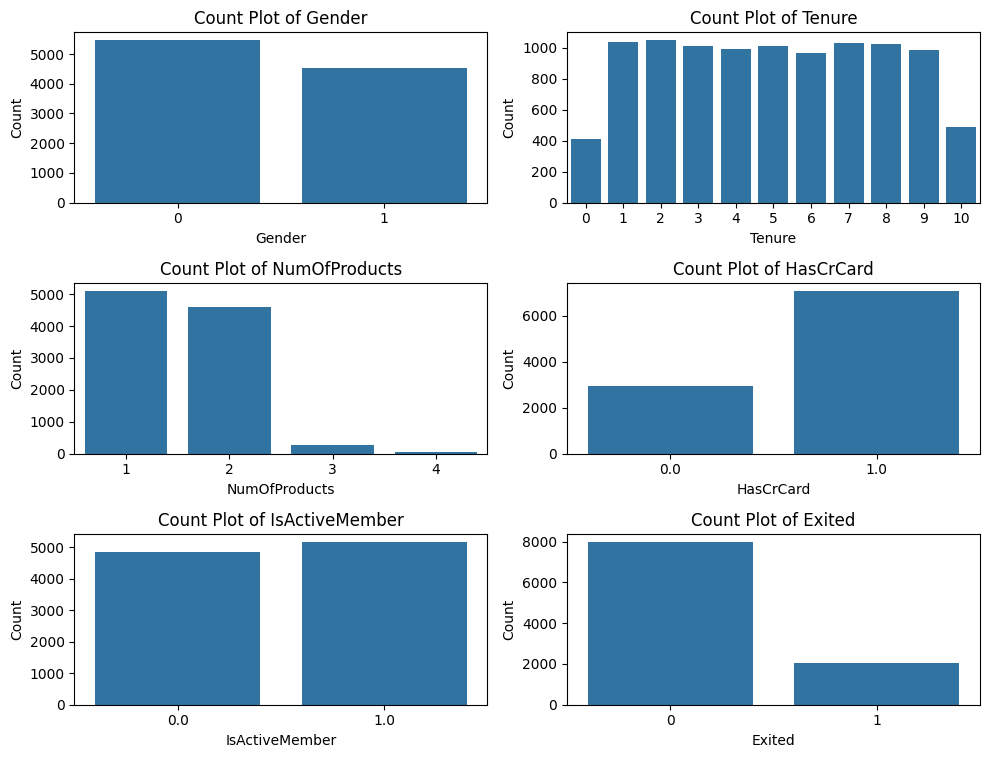

In [54]:
col_2= ['Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axes = axes.flatten()

for i, col in enumerate(col_2):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

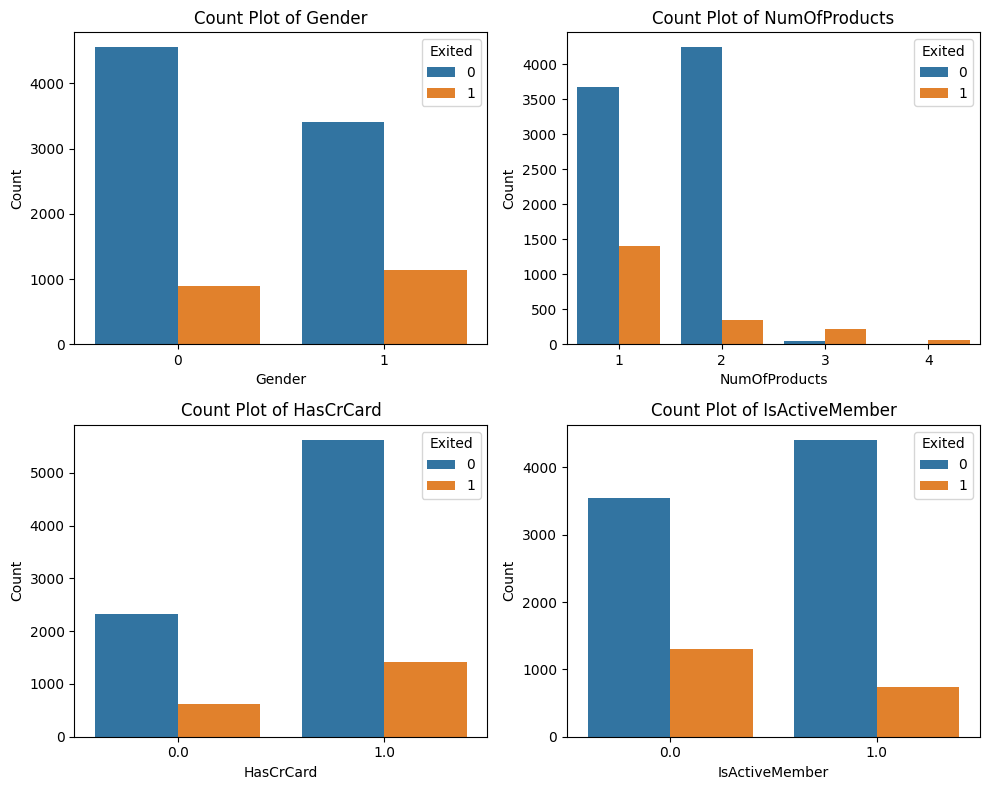

In [55]:
col_3= ['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

for i, col in enumerate(col_3):
    sns.countplot(x=df[col], ax=axes[i], hue= df['Exited'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Conclusion:

- **Higher churn for single-product customers**: Customers with only 1 product show a significant churn rate, indicating potential dissatisfaction or lack of engagement with the bank's offerings.
  
- **Lowest churn for two-product customers**: Customers with 2 products have the lowest churn, suggesting this group is more stable and less likely to leave.

- **High churn for three-product customers**: A concerning churn pattern is seen for customers with 3 products, indicating possible dissatisfaction with this specific product mix.

- **Complete churn for four-product customers**: All customers with 4 products have exited, signaling a critical issue with this group, likely due to dissatisfaction with complex product bundles or service.

- **Actionable Insights**: Focus retention efforts on single- and three-product customers, and investigate why all four-product customers are leaving to address underlying issues.

- **Higher churn for inactive customers**: Inactive customers have a significantly higher churn rate compared to active members.

- **Active customers are more likely to stay**: The lower churn rate among active members suggests that customer engagement and interaction with the bank significantly contribute to retention.

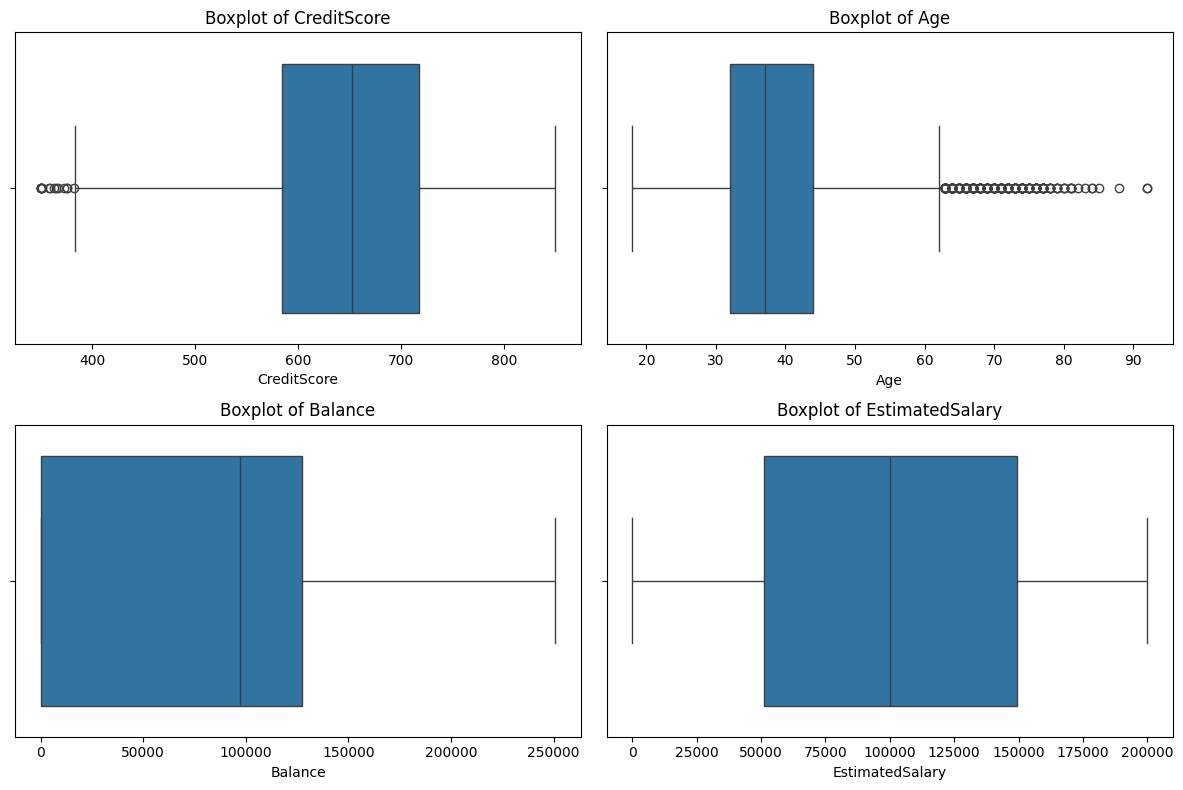

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot boxplot
for i, column in enumerate(col_1):
    sns.boxplot(x=col_1[i], data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col_1[i]}')

plt.tight_layout()
plt.show()

- **Credit Score Outliers**: A few customers exhibited notably low credit scores, indicating potential risk factors for churn.

- **Age Outliers**: The presence of outliers in the age column indicates a small group of senior citizens, suggesting that their behaviors and preferences might differ from younger customers.

- **Balance and Estimated salary:** Both the balance and estimated salary columns did not show any outliers, indicating a consistent distribution among these features.

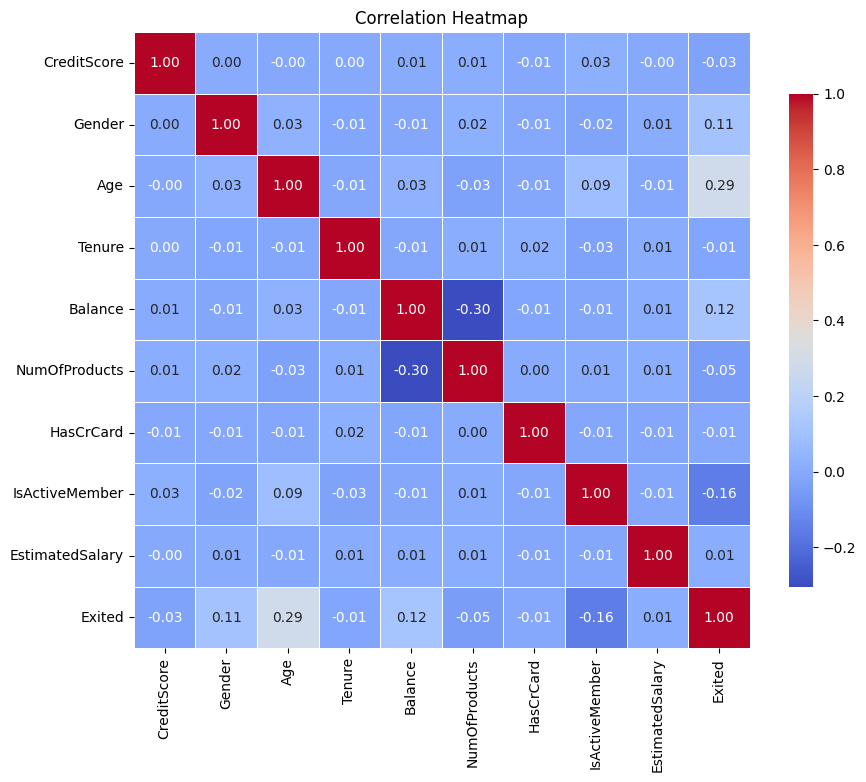

In [57]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

## Splitting data into Features and Target Variable

In [58]:
# Define features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

## Splitting data into Training and Testing Set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Importance using Random Forest

In [60]:
rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("\nFeature Importances:")
print(importance_df)


Feature Importances:
           Feature  Importance
2              Age    0.364817
5    NumOfProducts    0.219723
4          Balance    0.109089
8  EstimatedSalary    0.087035
0      CreditScore    0.086256
7   IsActiveMember    0.055498
3           Tenure    0.044432
1           Gender    0.023442
6        HasCrCard    0.009708


In [61]:
# Removing Tenure, HasCrCard, Exited features
X = df.drop(columns=['Gender', 'Tenure', 'HasCrCard', 'Exited'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Apply SMOTE technique for Imbalanced data

In [63]:
# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Model Building

### Random Forest Model with SMOTE

In [64]:
rf1 = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42)

rf1.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

### Model Evaluation

In [74]:
# Predict on the test set
y_pred = rf1.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1592
           1       0.60      0.63      0.62       408

    accuracy                           0.84      2000
   macro avg       0.75      0.76      0.76      2000
weighted avg       0.84      0.84      0.84      2000



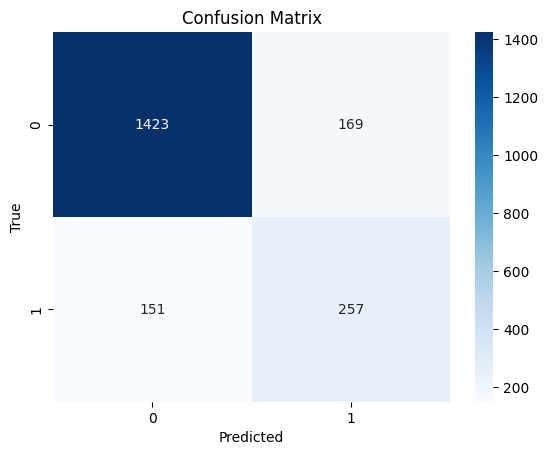

In [75]:
# Confusion matrix
confusion_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [67]:
# Perform cross-validation (using 5-fold by default)
cv_scores = cross_val_score(rf1, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Accuracy scores: ", cv_scores)
print("Mean Accuracy score: ", cv_scores.mean())

Cross-validation Accuracy scores:  [0.8475     0.858125   0.850625   0.855625   0.85178236]
Mean Accuracy score:  0.8527314727954971


### Random Forest Model with Class Weights Adjustment

In [69]:
rf2 = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=42, class_weight='balanced')

rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

### Model Evaluation

In [70]:
# Predict on the test set
y_pred = rf2.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1592
           1       0.56      0.69      0.62       408

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



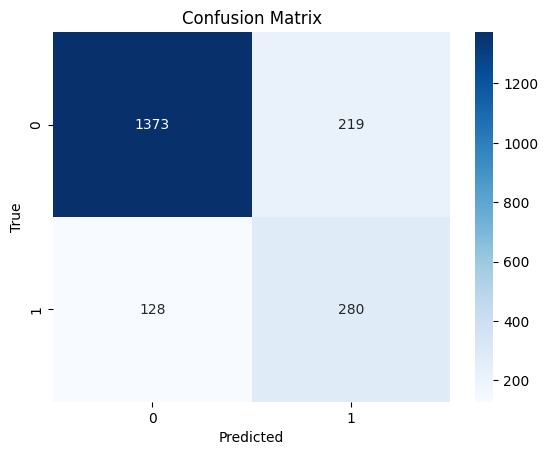

In [71]:
# Confusion matrix
confusion_rf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_rf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
# Perform cross-validation (using 5-fold by default)
cv_scores = cross_val_score(rf2, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation Accuracy scores: ", cv_scores)
print("Mean Accuracy score: ", cv_scores.mean())

Cross-validation Accuracy scores:  [0.82875    0.82125    0.809375   0.82       0.79924953]
Mean Accuracy score:  0.8157249061913696


## Conclusion

This project aims to predict customer churn using a Random Forest classifier. Two approaches were explored to address the class imbalance problem: **SMOTE (Synthetic Minority Over-sampling Technique)** and **Class Weights Adjustment** in the Random Forest model. The goal was to evaluate both techniques and recommend their use based on different business scenarios, focusing on minimizing either **Type I error** (false positives) or **Type II error** (false negatives).

---

### 1. **Model with SMOTE (Synthetic Minority Over-sampling Technique)**

#### Analysis:
- **Precision** of **0.60** indicates that 60% of predicted churners were actual churners.
- **Recall** of **0.63** shows that the model correctly identified 63% of actual churners, but missed 37% of them (false negatives).
- Overall accuracy is solid at **84%**, and the model performed consistently with **85.27% mean accuracy** across cross-validation folds.

#### When to Use:
- **Use SMOTE** when the business priority is to minimize **Type I errors** (false positives). This would be beneficial when:
  - The cost of unnecessarily targeting non-churners is high.
  - Resources are limited, and you want to avoid mistakenly identifying customers who are unlikely to churn.

---

### 2. **Model with Class Weights Adjustment**

#### Analysis:
- **Precision** of **0.56** is slightly lower than the SMOTE model, meaning more non-churners are misclassified as churners (higher false positives).
- **Recall** of **0.69** is better, indicating that the model identified 69% of actual churners, missing only 31% of them (lower false negatives).
- The model's **accuracy** of **83%** is slightly lower than the SMOTE model, and the cross-validation mean accuracy is **81.57%**.

#### When to Use:
- **Use Class Weights Adjustment** when the business priority is to minimize **Type II errors** (false negatives). This is ideal when:
  - Missing actual churners has a significant impact on revenue.
  - The cost of not identifying a customer likely to churn is high, making it crucial to retain as many churners as possible.

---

### Recommendations:
- The **SMOTE model** is better suited for businesses focused on reducing **false positives** (Type I errors). If retention efforts are costly or the business wants to avoid incorrectly targeting non-churners, this model should be used.
- The **Class Weights model** is better for businesses where **false negatives** (Type II errors) are more critical. If missing a churner is expensive, such as in subscription-based businesses where retaining every customer is key, this model is preferable due to its higher recall.
  
The choice between these models depends on the business context and the cost associated with **misclassifying churners vs. non-churners**.